In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [4]:
file_path = r"C:\Users\muski\Desktop\NewProject\Estate\Real_Estate_Sales_2001-2020_GL.csv"

In [5]:
df = pd.read_csv(file_path)
df.sample(5)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold
523325,90755,2009,29/09/2010,Milford,63 CLARK HILL ROAD,265600,203000.0,1.308374,Single Family,Single Family,1
596942,110733,2011,24/07/2012,Norwalk,102 HIGHLAND AVE,611940,565000.0,1.083080,Nan,Nan,1
915390,18216,2018,31/12/2018,East Hartford,72 WARREN DR.,81230,121500.0,0.668500,Single Family,Single Family,0
135633,20571,2002,04/04/2003,Fairfield,184 PUTTING GRN RD,166530,284000.0,0.586373,Nan,Nan,1
71027,10009,2001,02/10/2001,East Hampton,60 FLANDERS RD,96950,140000.0,0.692500,Nan,Nan,0


In [6]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [7]:
df.isnull().sum()

Serial Number       0
List Year           0
Date Recorded       0
Town                0
Address             0
Assessed Value      0
Sale Amount         0
Sales Ratio         0
Property Type       0
Residential Type    0
Years until sold    0
dtype: int64

In [8]:
df['Date Recorded'] = pd.to_datetime(df['Date Recorded'], dayfirst=True)
df['Day_of_Week'] = df['Date Recorded'].dt.dayofweek
df['Month'] = df['Date Recorded'].dt.month
df['Year'] = df['Date Recorded'].dt.year
df['Day_of_Week'] = df['Day_of_Week'] + 1

In [9]:
df.sample(6)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold,Day_of_Week,Month,Year
292412,40779,2004,2005-08-23,Glastonbury,137 MORGAN DR,147600,345000.0,0.427826,Nan,Nan,1,2,8,2005
381373,51257,2005,2006-06-01,Norwalk,3 OAKWOOD AVE UT A 8,199920,348000.0,0.574483,Nan,Nan,1,4,6,2006
506868,80263,2008,2009-03-03,West Hartford,46 LEDGEWOOD ROAD,193900,291000.0,0.666323,Single Family,Single Family,1,2,3,2009
887499,173193,2017,2018-08-20,Shelton,65 BEECHER AVE,164010,190000.0,0.863200,Single Family,Single Family,1,1,8,2018
57193,20067,2020,2020-12-15,Winchester,53 PARK PLACE,178500,154000.0,1.159000,Residential,Single Family,0,2,12,2020
343982,50386,2005,2006-03-27,Glastonbury,216 WASSUC RD,151400,336000.0,0.450595,Nan,Nan,1,1,3,2006


In [10]:
df.nunique()

Serial Number        83537
List Year               20
Date Recorded         6387
Town                   170
Address             714372
Assessed Value       91378
Sale Amount          57372
Sales Ratio         547044
Property Type           12
Residential Type         6
Years until sold        15
Day_of_Week              7
Month                   12
Year                    22
dtype: int64

In [11]:
df.describe()

,Serial Number,List Year,Date Recorded,Assessed Value,Sale Amount,Sales Ratio,Years until sold,Day_of_Week,Month,Year
count,9.972130e+05,997213.000000,997213,9.972130e+05,9.972130e+05,9.972130e+05,997213.000000,997213.000000,997213.000000,997213.000000
mean,4.311864e+05,2010.189829,2011-06-19 11:36:47.021769216,2.791437e+05,3.911512e+05,1.044637e+01,0.750900,2.926005,6.812803,2010.940729
min,0.000000e+00,2001.000000,1999-04-05 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,-18.000000,1.000000,1.000000,1999.000000
25%,3.044400e+04,2004.000000,2005-07-25 00:00:00,8.760000e+04,1.400000e+05,4.867000e-01,1.000000,2.000000,4.000000,2005.000000
50%,7.030300e+04,2010.000000,2011-01-19 00:00:00,1.383900e+05,2.250000e+05,6.246000e-01,1.000000,3.000000,7.000000,2011.000000
75%,1.518780e+05,2016.000000,2017-04-05 00:00:00,2.255600e+05,3.650000e+05,7.852761e-01,1.000000,4.000000,9.000000,2017.000000
max,2.000500e+09,2020.000000,2021-09-30 00:00:00,8.815100e+08,5.000000e+09,1.226420e+06,4.000000,7.000000,12.000000,2021.000000
std,6.549219e+06,6.237877,NaN,1.670610e+06,5.347270e+06,1.890192e+03,0.434742,1.463068,3.237718,6.247524


In [12]:
df.columns

Index(['Serial Number', 'List Year', 'Date Recorded', 'Town', 'Address',
       'Assessed Value', 'Sale Amount', 'Sales Ratio', 'Property Type',
       'Residential Type', 'Years until sold', 'Day_of_Week', 'Month', 'Year'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997213 entries, 0 to 997212
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Serial Number     997213 non-null  int64         
 1   List Year         997213 non-null  int64         
 2   Date Recorded     997213 non-null  datetime64[ns]
 3   Town              997213 non-null  object        
 4   Address           997213 non-null  object        
 5   Assessed Value    997213 non-null  int64         
 6   Sale Amount       997213 non-null  float64       
 7   Sales Ratio       997213 non-null  float64       
 8   Property Type     997213 non-null  object        
 9   Residential Type  997213 non-null  object        
 10  Years until sold  997213 non-null  int64         
 11  Day_of_Week       997213 non-null  int32         
 12  Month             997213 non-null  int32         
 13  Year              997213 non-null  int32         
dtypes: d

### Average Assessed Value, Sale Amount  and Sales Ratio of properties from year to year?

In [14]:
average_av = df.groupby(df['Year'])['Assessed Value'].mean()
average_sa = df.groupby(df['Year'])['Sale Amount'].mean()
average_sr = df.groupby(df['Year'])['Sales Ratio'].mean()

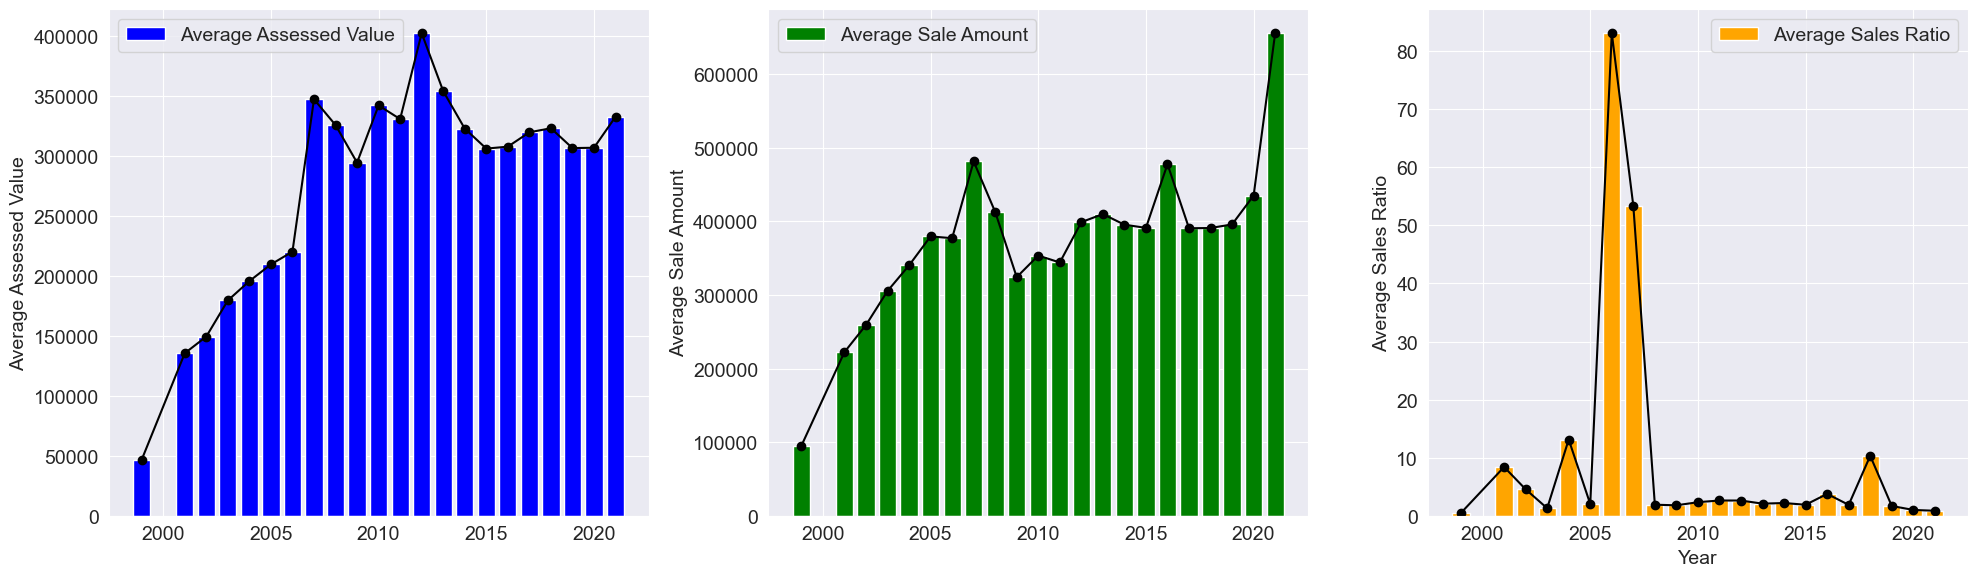

In [15]:
# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6), sharex=True)


# Bar chart for average assessed value
ax1.bar(average_av.index, average_av.values, label='Average Assessed Value', color='blue')
ax1.plot(average_av.index, average_av.values, marker='o', color='black')
ax1.set_ylabel('Average Assessed Value')
ax1.legend()

# Bar chart for average sale amount
ax2.bar(average_sa.index, average_sa.values, label='Average Sale Amount', color='green')
ax2.plot(average_sa.index, average_sa.values, marker='o', color='black')
ax2.set_ylabel('Average Sale Amount')
ax2.legend()

# Bar chart for average sales ratio
ax3.bar(average_sr.index, average_sr.values, label='Average Sales Ratio', color='orange')
ax3.plot(average_sr.index, average_sr.values, marker='o', color='black')
ax3.set_ylabel('Average Sales Ratio')
ax3.legend()

# Set common xlabel
plt.xlabel('Year')

# Show the plot
plt.tight_layout()
plt.show()

### How long, on average, did it take for property types and Residential Types to get sold?

In [16]:
# Replace the string 'Nan' with actual NaN values
df['Residential Type'].replace('Nan', pd.NA, inplace=True)
df['Property Type'].replace('Nan', pd.NA, inplace=True)

In [17]:
average_rt = df.groupby(df['Residential Type'])['Sales Ratio'].mean().dropna()
average_pt = df.groupby(df['Property Type'])['Sales Ratio'].mean().dropna()

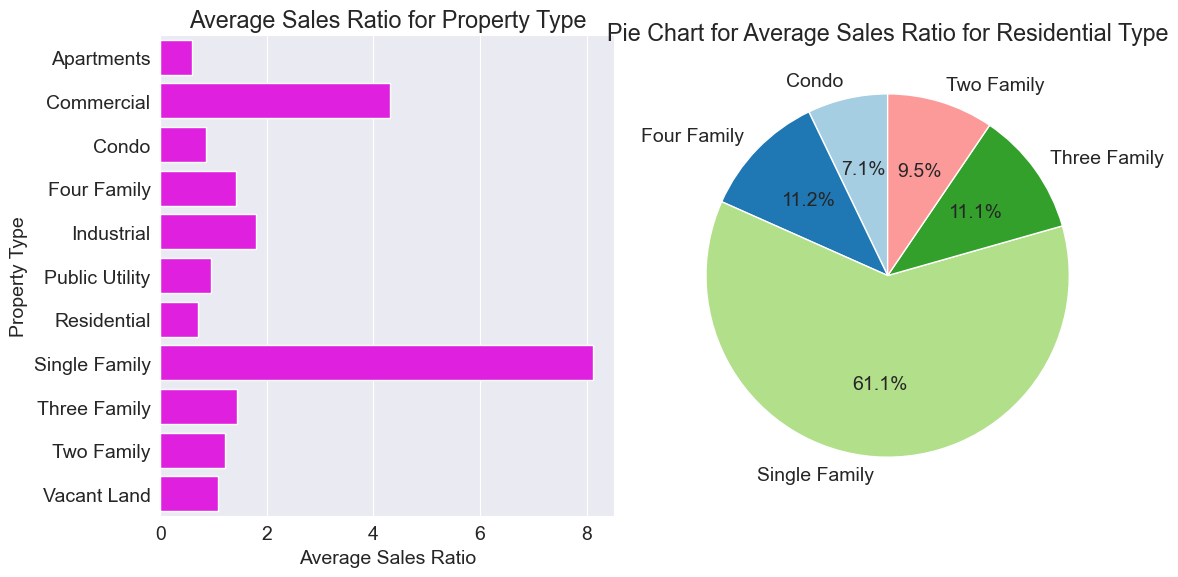

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot area plot for 'Property Type'
sns.barplot(x=average_pt.values, y=average_pt.index, ax=axes[0], color='magenta')
axes[0].set_title('Average Sales Ratio for Property Type')
axes[0].set_xlabel('Average Sales Ratio')
axes[0].set_ylabel('Property Type')

# Plot pie chart for 'Residential Type'
axes[1].pie(average_rt, labels=average_rt.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
axes[1].set_title('Pie Chart for Average Sales Ratio for Residential Type')

# Show the plot
plt.tight_layout()
plt.show()

### Which towns saw the most property sales in 2021?


In [19]:
# Filter data for the year 2021
sales_2021 = df[df['Date Recorded'].dt.year == 2021]
# Group by town and sum the sales amount
property_sales_2021 = sales_2021.groupby('Town')['Sale Amount'].sum()
property_sales_2021

Town
Andover          1.636057e+07
Ansonia          6.756088e+07
Ashford          2.505801e+07
Avon             2.106776e+08
Barkhamsted      1.358754e+07
                     ...     
Windsor Locks    5.170568e+07
Wolcott          8.440762e+07
Woodbridge       6.449748e+07
Woodbury         1.063542e+08
Woodstock        4.911969e+07
Name: Sale Amount, Length: 139, dtype: float64

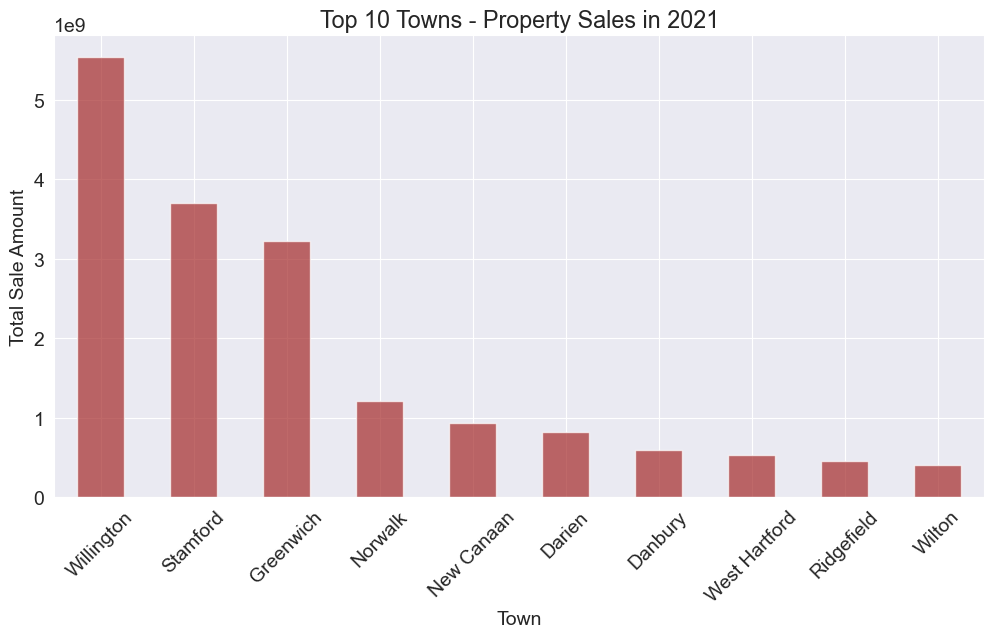

In [20]:
# Top 10
top_n = 10  
property_sales_2021.nlargest(top_n).plot(kind='bar', figsize=(12, 6), color='brown', alpha=0.7)
plt.title(f'Top {top_n} Towns - Property Sales in 2021')
plt.xlabel('Town')
plt.ylabel('Total Sale Amount')
plt.xticks(rotation=45)
plt.show()

### Correlation

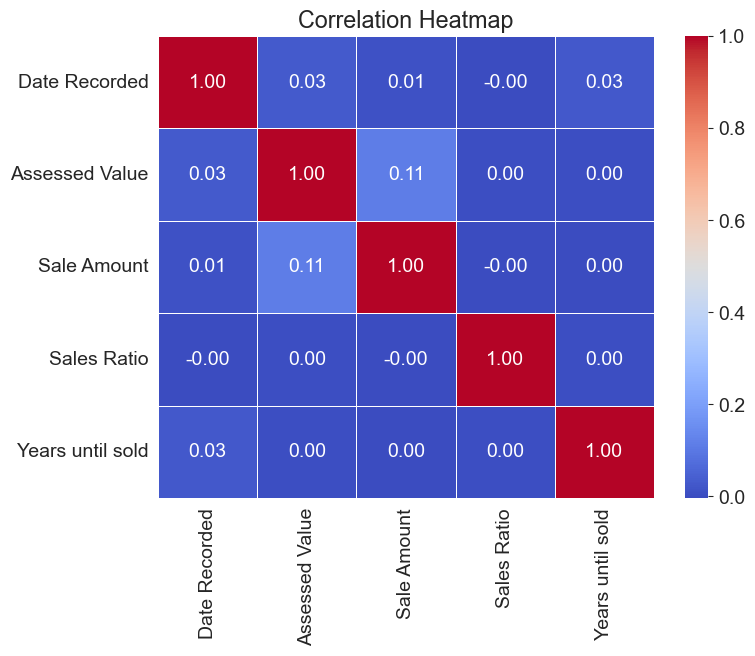

In [21]:
# For this example, I'll use 'Date Recorded','Assessed Value', 'Sale Amount', 'Sales Ratio', 'Years until sold'
df_correlation = ['Date Recorded','Assessed Value', 'Sale Amount', 'Sales Ratio', 'Years until sold']
corr = df[df_correlation].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

### modelling 

In [22]:
features = ['Assessed Value', 'Years until sold', 'Day_of_Week', 'Month', 'Year']
target = 'Sale Amount'

In [23]:
# Select features and target variable
X = df[features]
y = df[target]

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)


In [26]:

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_scaler, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaler)

In [27]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [28]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 4110704450354.3853
R-squared: 0.12982957918575977


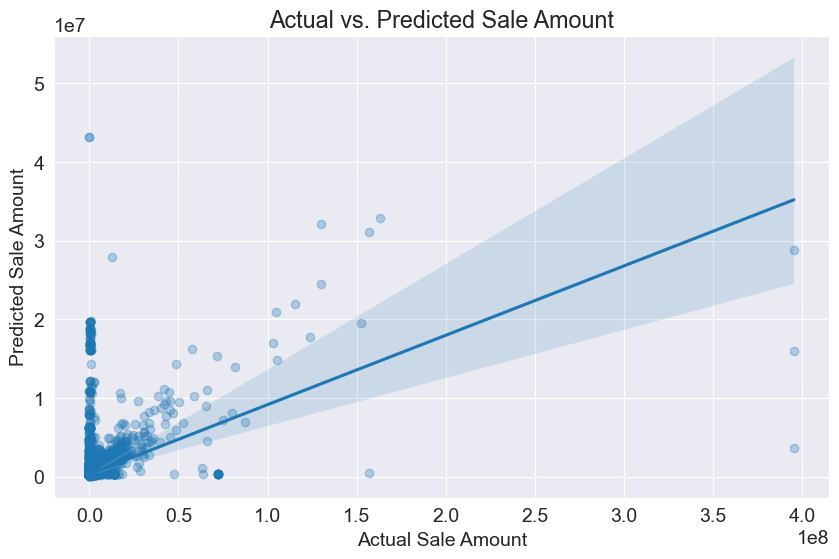

In [29]:
# Visualize predictions vs. actual values using Seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.3})
plt.xlabel('Actual Sale Amount')
plt.ylabel('Predicted Sale Amount')
plt.title('Actual vs. Predicted Sale Amount')
plt.show()